In [1]:
# !uv add simglucose

Resolved 219 packages in 6.85s
Prepared 9 packages in 5.93s
Uninstalled 1 package in 2ms
Installed 11 packages in 633ms
 ~ diabetes==0.1.0 (from file:///D:/code/python/diabetes)
 + dill==0.4.0
 + farama-notifications==0.0.4
 + gym==0.9.4
 + gymnasium==0.29.1
 + multiprocess==0.70.18
 + pathos==0.3.4
 + pox==0.3.6
 + ppft==1.7.7
 + pyglet==2.1.11
 + simglucose==0.2.11


D:\code\python\diabetes\.venv\lib\site-packages\gym\envs\registration.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Show animation? (y/n)  y
Use multiple processes? (y/n)  y
Folder name to save results [default]:  


Results will be saved in D:\code\python\diabetes\results\2025-11-30_21-10-27


Input simulation time (hr):  12


Select scnenario:
[1] Random Scnenario
[2] Custom Scnenario


>>> 1
Input simulation start time (hr):  00


Simulation start time is set to 2025-11-30 00:00:00.


Select random seed for random scenario [None]:  1974
Select virtual patients:
[1] All
[2] All Adolescents
[3] All Adults
[4] All Children
[5] By ID
>>>  5


Select patient:
[1] adolescent#001
[2] adolescent#002
[3] adolescent#003
[4] adolescent#004
[5] adolescent#005
[6] adolescent#006
[7] adolescent#007
[8] adolescent#008
[9] adolescent#009
[10] adolescent#010
[11] adult#001
[12] adult#002
[13] adult#003
[14] adult#004
[15] adult#005
[16] adult#006
[17] adult#007
[18] adult#008
[19] adult#009
[20] adult#010
[21] child#001
[22] child#002
[23] child#003
[24] child#004
[25] child#005
[26] child#006
[27] child#007
[28] child#008
[29] child#009
[30] child#010
[D] Done


>>>  11


Select patient:
[1] adolescent#001
[2] adolescent#002
[3] adolescent#003
[4] adolescent#004
[5] adolescent#005
[6] adolescent#006
[7] adolescent#007
[8] adolescent#008
[9] adolescent#009
[10] adolescent#010
[11] adult#001
[12] adult#002
[13] adult#003
[14] adult#004
[15] adult#005
[16] adult#006
[17] adult#007
[18] adult#008
[19] adult#009
[20] adult#010
[21] child#001
[22] child#002
[23] child#003
[24] child#004
[25] child#005
[26] child#006
[27] child#007
[28] child#008
[29] child#009
[30] child#010
[D] Done


>>>  d


Select the CGM sensor:
[1] Dexcom
[2] GuardianRT
[3] Navigator


>>>  1
Select Random Seed for Sensor Noise [None]:  1974


Select the insulin pump:
[1] Cozmo
[2] Insulet


>>>  1


Select controller:
[1] Basal-Bolus Controller


>>> 1


Simulation took 45.095136404037476 sec.


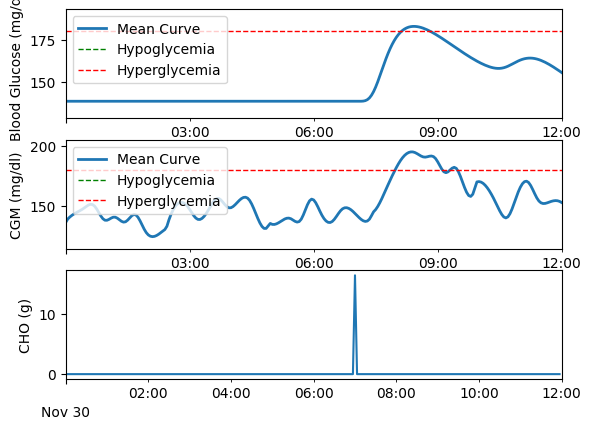

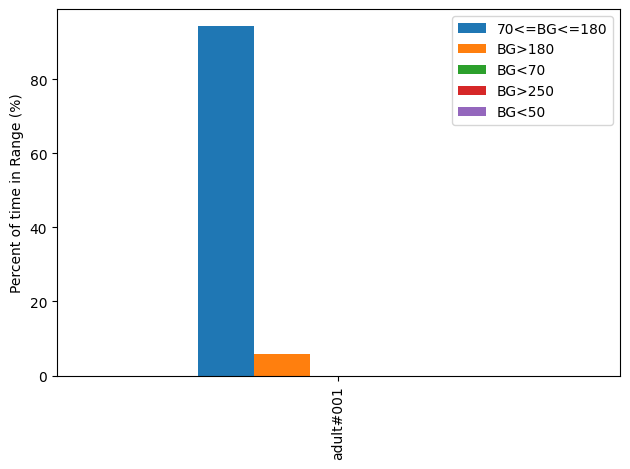

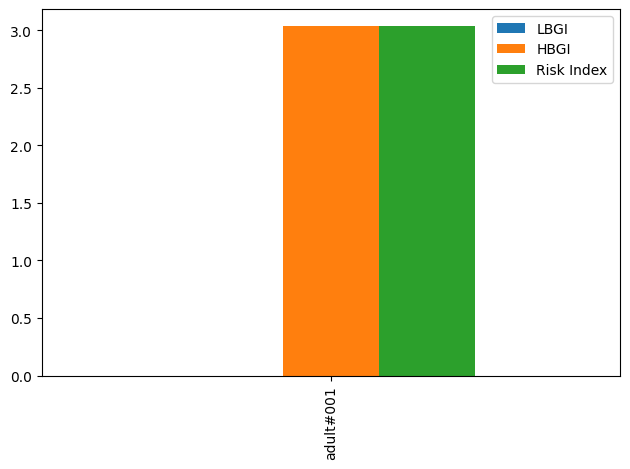

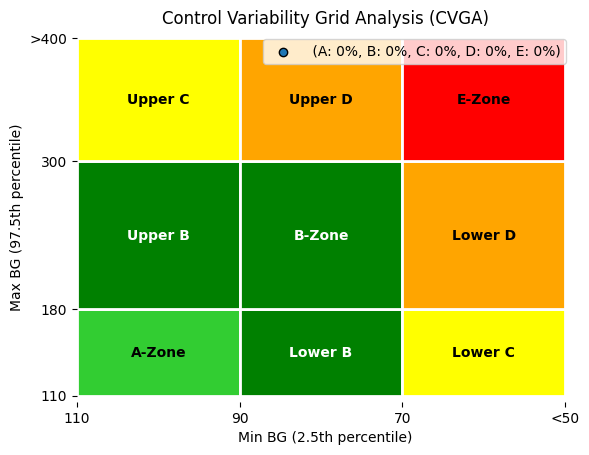

,70<=BG<=180,BG>180,BG<70,BG>250,BG<50,LBGI,HBGI,Risk Index
adult#001,94.190871,5.809129,0.0,0.0,0.0,0.0,3.031626,3.031626


In [2]:
from simglucose.simulation.user_interface import simulate
simulate()

In [3]:
from simglucose.simulation.env import T1DSimEnv
from simglucose.controller.basal_bolus_ctrller import BBController
from simglucose.sensor.cgm import CGMSensor
from simglucose.actuator.pump import InsulinPump
from simglucose.patient.t1dpatient import T1DPatient
from simglucose.simulation.scenario_gen import RandomScenario
from simglucose.simulation.scenario import CustomScenario
from simglucose.simulation.sim_engine import SimObj, sim, batch_sim
from datetime import timedelta
from datetime import datetime

In [4]:
# specify start_time as the beginning of today
now = datetime.now()
start_time = datetime.combine(now.date(), datetime.min.time())

In [5]:
# --------- Create Random Scenario --------------
# Specify results saving path
path = './results'

In [6]:
# Create a simulation environment
patient = T1DPatient.withName('adolescent#001')
sensor = CGMSensor.withName('Dexcom', seed=1)
pump = InsulinPump.withName('Insulet')
scenario = RandomScenario(start_time=start_time, seed=1)
env = T1DSimEnv(patient, sensor, pump, scenario)

In [7]:
# Create a controller
controller = BBController()

In [8]:
# Put them together to create a simulation object
s1 = SimObj(env, controller, timedelta(days=1), animate=False, path=path)
results1 = sim(s1)
print(results1)

Process ID: 16036
Simulation starts ...
Simulation Completed!
                             BG         CGM  CHO   insulin      LBGI  \
Time                                                                   
2025-11-30 00:00:00  149.020000  165.793949  0.0  0.013933  0.000000   
2025-11-30 00:03:00  149.020000  161.582022  0.0  0.013933  0.000000   
2025-11-30 00:06:00  149.020000  159.239373  0.0  0.013933  0.000000   
2025-11-30 00:09:00  149.020000  157.472710  0.0  0.013933  0.000000   
2025-11-30 00:12:00  149.020000  156.108950  0.0  0.013933  0.000000   
...                         ...         ...  ...       ...       ...   
2025-11-30 23:48:00  100.097584  100.530199  0.0  0.013933  0.474119   
2025-11-30 23:51:00   99.845591   99.581672  0.0  0.013933  0.494752   
2025-11-30 23:54:00   99.606073   98.858595  0.0  0.013933  0.514820   
2025-11-30 23:57:00   99.379912   98.467090  0.0  0.013933  0.534180   
2025-12-01 00:00:00   99.167888   98.404281  NaN       NaN  0.552694   

 

In [9]:
type(results1)

pandas.core.frame.DataFrame

In [10]:
# --------- Create Custom Scenario --------------
# Create a simulation environment
patient = T1DPatient.withName('adolescent#001')
sensor = CGMSensor.withName('Dexcom', seed=1)
pump = InsulinPump.withName('Insulet')
# custom scenario is a list of tuples (time, meal_size)
scen = [(7, 45), (12, 70), (16, 15), (18, 80), (23, 10)]
scenario = CustomScenario(start_time=start_time, scenario=scen)
env = T1DSimEnv(patient, sensor, pump, scenario)

# Create a controller
controller = BBController()

# Put them together to create a simulation object
s2 = SimObj(env, controller, timedelta(days=1), animate=False, path=path)
results2 = sim(s2)
print(results2)

Process ID: 16036
Simulation starts ...
Simulation Completed!
                             BG         CGM  CHO   insulin      LBGI  \
Time                                                                   
2025-11-30 00:00:00  149.020000  165.793949  0.0  0.013933  0.000000   
2025-11-30 00:03:00  149.020000  161.582022  0.0  0.013933  0.000000   
2025-11-30 00:06:00  149.020000  159.239373  0.0  0.013933  0.000000   
2025-11-30 00:09:00  149.020000  157.472710  0.0  0.013933  0.000000   
2025-11-30 00:12:00  149.020000  156.108950  0.0  0.013933  0.000000   
...                         ...         ...  ...       ...       ...   
2025-11-30 23:48:00   93.366001   93.736518  0.0  0.013933  1.204979   
2025-11-30 23:51:00   93.288345   92.966818  0.0  0.013933  1.215732   
2025-11-30 23:54:00   93.210068   92.409334  0.0  0.013933  1.226629   
2025-11-30 23:57:00   93.133161   92.171035  0.0  0.013933  1.237391   
2025-12-01 00:00:00   93.059999   92.250490  NaN       NaN  1.247680   

 

In [11]:
# --------- batch simulation --------------
# Re-initialize simulation objects
s1.reset()
s2.reset()

# create a list of SimObj, and call batch_sim
s = [s1, s2]
results = batch_sim(s, parallel=True)
print(results)

Simulation took 6.558680534362793 sec.
[                             BG         CGM  CHO   insulin      LBGI  \
Time                                                                   
2025-11-30 00:00:00  149.020000  165.793949  0.0  0.013933  0.000000   
2025-11-30 00:03:00  149.020000  161.582022  0.0  0.013933  0.000000   
2025-11-30 00:06:00  149.020000  159.239373  0.0  0.013933  0.000000   
2025-11-30 00:09:00  149.020000  157.472710  0.0  0.013933  0.000000   
2025-11-30 00:12:00  149.020000  156.108950  0.0  0.013933  0.000000   
...                         ...         ...  ...       ...       ...   
2025-11-30 23:48:00  100.097584  100.530199  0.0  0.013933  0.474119   
2025-11-30 23:51:00   99.845591   99.581672  0.0  0.013933  0.494752   
2025-11-30 23:54:00   99.606073   98.858595  0.0  0.013933  0.514820   
2025-11-30 23:57:00   99.379912   98.467090  0.0  0.013933  0.534180   
2025-12-01 00:00:00   99.167888   98.404281  NaN       NaN  0.552694   

                       

In [12]:
type(results)

list

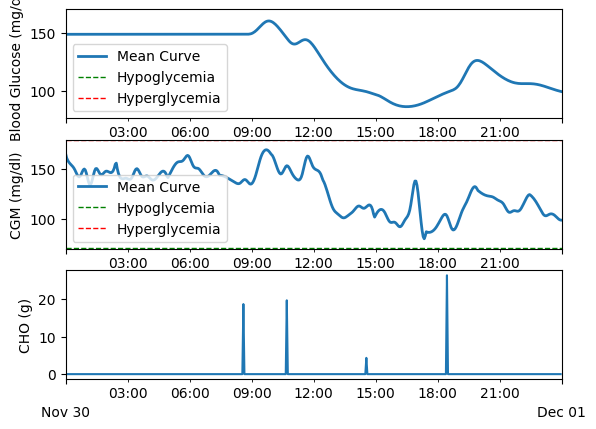

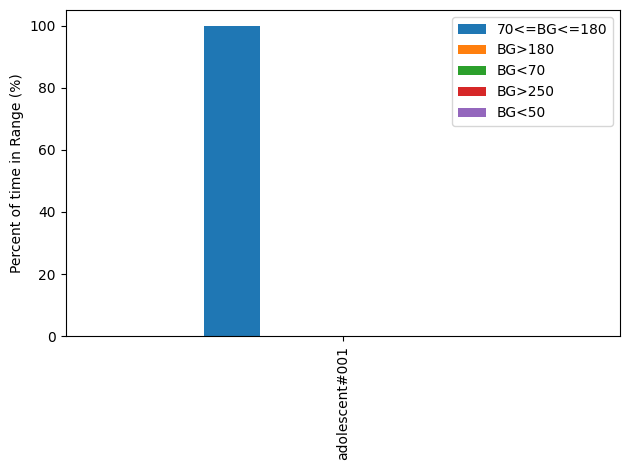

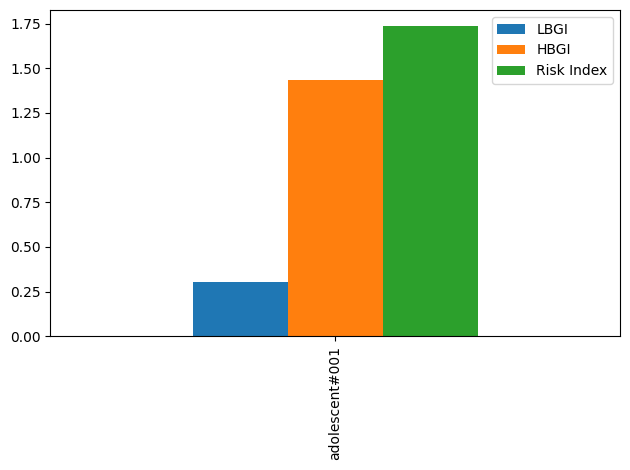

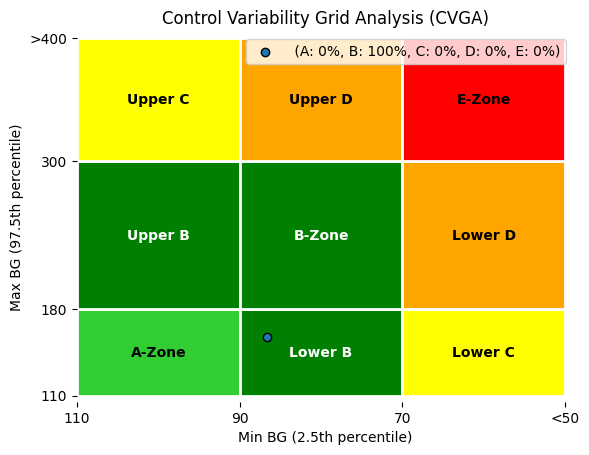

(                70<=BG<=180  BG>180  BG<70  BG>250  BG<50      LBGI      HBGI  \
 adolescent#001        100.0     0.0    0.0     0.0    0.0  0.302927  1.436308   
 
                 Risk Index  
 adolescent#001    1.739235  ,
                                  0         1         2         3         4   \
 LBGI       adolescent#001  0.000000  0.000000  0.000000  0.000000  0.000000   
 HBGI       adolescent#001  2.755277  2.755324  2.755507  2.755808  2.756142   
 Risk Index adolescent#001  2.755277  2.755324  2.755507  2.755808  2.756142   
 
                                  5         6         7         8         9   \
 LBGI       adolescent#001  0.000000  0.000000  0.000000  0.000000  0.000000   
 HBGI       adolescent#001  2.756448  2.756701  2.756897  2.761495  3.768064   
 Risk Index adolescent#001  2.756448  2.756701  2.756897  2.761495  3.768064   
 
                            ...        14        15        16        17  \
 LBGI       adolescent#001  ...  0.548261  1.378843  2

In [16]:
from simglucose.analysis.report import report
import pandas as pd
from pathlib import Path
import os


# get the path to the example folder
example_pth = Path(os.path.abspath(''))

# find all csv with pattern *#*.csv, e.g. adolescent#001.csv
result_filenames = list(example_pth.glob(
    'results/*#*.csv'))
patient_names = [f.stem for f in result_filenames]
df = pd.concat(
        [pd.read_csv(str(f), index_col=0) for f in result_filenames],
        keys=patient_names)
report(df)